# **TREINAMENTO e VALIDAÇÃO DE MODELOS**

#### Importação de dados e bibliotecas

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento/Pré-Processamento e Otimização
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

# Modelos de ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Validação dos modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.style.use('Solarize_Light2')

In [2]:
train = pd.read_csv(filepath_or_buffer="../data/train.csv")
test = pd.read_csv(filepath_or_buffer="../data/test.csv")

In [21]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)
    plt.show()

def sigmoid_activation(list_: ) -> list:
    result = []
    for i in list_:
        if i >= 5:
            result.append(1)
            continue
        result.append(0)
    return result

# **SEPARAÇÃO DE DADOS**

In [4]:
train.drop(columns="Unnamed: 0", inplace=True)
test.drop(columns="Unnamed: 0", inplace=True)

In [5]:
X_train = train.drop(['Potability'], axis=1)
y_train = train.Potability

X_test = test.drop(['Potability'], axis=1)
y_test = test.Potability

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3220, 8)
(656, 8)
(3220,)
(656,)


# **TREINAMENTO DOS MODELOS**

### K-NEAREST NEIGHBORS

In [7]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(n_jobs=-1)

### NAIVE BAYS

In [8]:
naive_bays = GaussianNB()
naive_bays.fit(X=X_train, y=y_train)

GaussianNB()

### RANDOM FOREST

In [9]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=2024)
rfc.fit(X=X_train, y=y_train)

RandomForestClassifier(n_jobs=-1, random_state=2024)

### NEURAL NETWORK

In [10]:
model = keras.Sequential(
    layers=[
        layers.Dense(10, activation='tanh'),
        layers.Dense(5, activation='tanh'),
        layers.Dense(1, activation='sigmoid')
    ]
)
model.summary()
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# **INFERÊNCIA E VALIDAÇÃO**

### K-NEAREST NEIGHBORS

In [11]:
y_pred = knn.predict(X=X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       388
           1       0.46      0.56      0.50       268

    accuracy                           0.55       656
   macro avg       0.55      0.55      0.55       656
weighted avg       0.57      0.55      0.55       656



### NAIVE BAYS

In [12]:
y_pred = naive_bays.predict(X=X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.61      0.43      0.51       388
           1       0.42      0.60      0.49       268

    accuracy                           0.50       656
   macro avg       0.51      0.52      0.50       656
weighted avg       0.53      0.50      0.50       656



### RANDOM FOREST

In [13]:
y_pred = rfc.predict(X=X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65       388
           1       0.47      0.41      0.44       268

    accuracy                           0.57       656
   macro avg       0.55      0.55      0.55       656
weighted avg       0.56      0.57      0.56       656



### NEURAL NETWORK

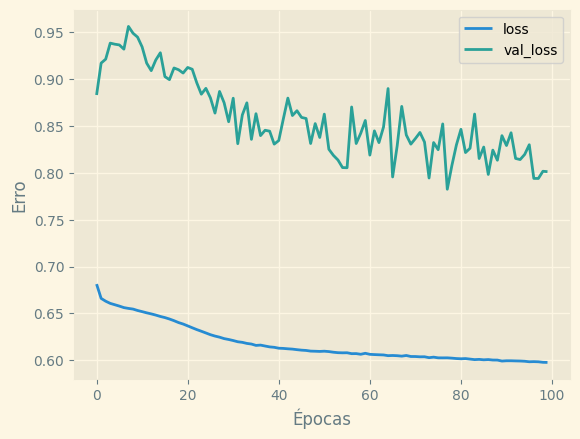

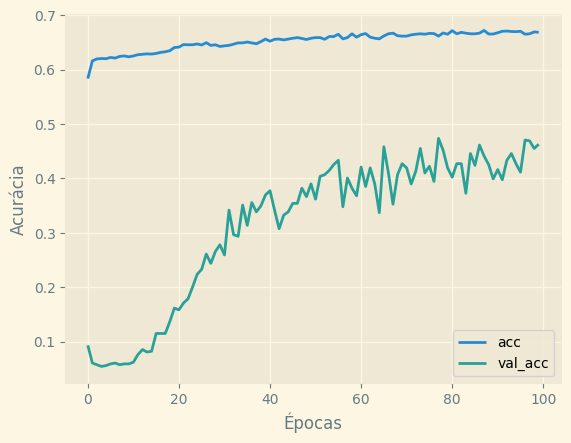

In [22]:
plot_loss(history)
plot_acc(history)

In [16]:
y_pred = model.predict(X_test)
print(classification_report(y_pred=sigmoid_activation(y_pred), y_true=y_test))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       388
           1       0.00      0.00      0.00       268

    accuracy                           0.59       656
   macro avg       0.30      0.50      0.37       656
weighted avg       0.35      0.59      0.44       656



c:\Users\luan-\Documents\workspace\Facul\S8\Reconhecimento de Padrões\patternRecognition-supervisedLearning\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\luan-\Documents\workspace\Facul\S8\Reconhecimento de Padrões\patternRecognition-supervisedLearning\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\luan-\Documents\workspace\Facul\S8\Reconhecimento de Padrões\patternRecognition-supervisedLearning\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: Undefined

# **FEATURE IMPORTANCE TREE**

Text(0.5, 1.0, 'Feature Importance - RandomForest')

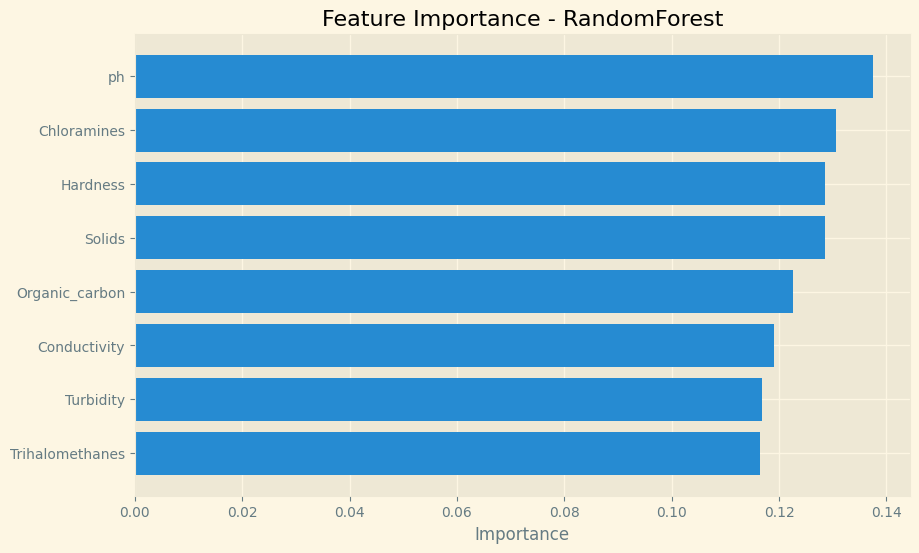

In [17]:
feature_importance = rfc.feature_importances_
columns = X_train.columns
sorted_id = feature_importance.argsort()

plt.figure(figsize=(10,6))
plt.barh(columns[sorted_id], feature_importance[sorted_id])
plt.xlabel("Importance")
plt.title('Feature Importance - RandomForest')